In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv("iris.csv")
print(df.head())
df.drop("Id", axis=1, inplace=True)
X = df.drop("Species", axis=1)
y = df["Species"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
k_range = range(1, 11)
accuracies = []

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


K=1 | Accuracy=0.98
K=2 | Accuracy=0.98
K=3 | Accuracy=1.00
K=4 | Accuracy=0.98
K=5 | Accuracy=1.00
K=6 | Accuracy=1.00
K=7 | Accuracy=1.00
K=8 | Accuracy=1.00
K=9 | Accuracy=1.00
K=10 | Accuracy=1.00


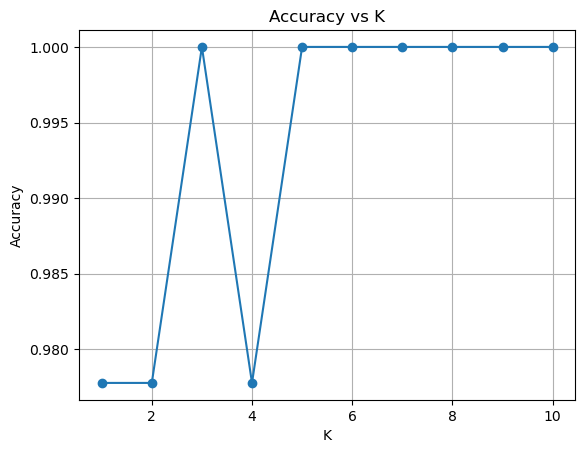

In [6]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} | Accuracy={acc:.2f}")

plt.figure()
plt.plot(k_range, accuracies, marker='o')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Best K: 3


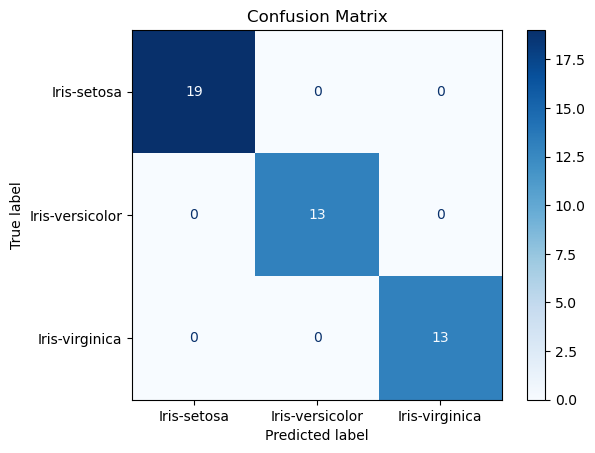

In [7]:
best_k = k_range[np.argmax(accuracies)]
print(f"Best K: {best_k}")
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

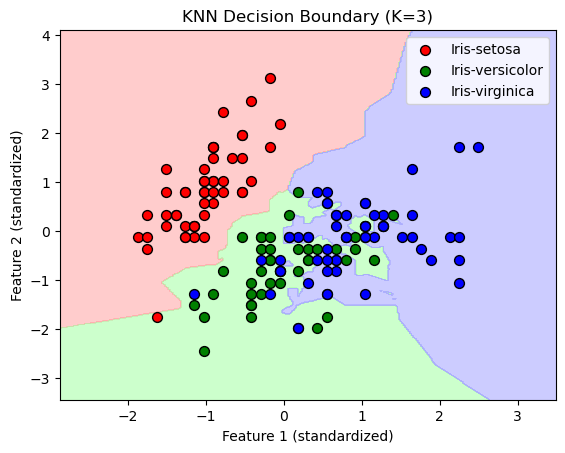

In [20]:
def plot_decision_boundaries(X, y_labels, k):
    X_plot = X[:, :2]
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_labels)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_plot, y_encoded)
    h = .02
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    for i, label in enumerate(le.classes_):
        plt.scatter(X_plot[y_encoded == i, 0], X_plot[y_encoded == i, 1],c=cmap_bold[i], label=label, edgecolor='k', s=50)

    plt.xlabel("Feature 1 (standardized)")
    plt.ylabel("Feature 2 (standardized)")
    plt.title(f"KNN Decision Boundary (K={k})")
    plt.legend()
    plt.show()
plot_decision_boundaries(X_scaled, y.values, best_k)